In [1]:
#hide
from utils import *
hc(
    "Spectral Footprints of Spoken Alphabets",
    []
)

## QUEST


## AIM

Build a system that takes an utterance of english alphabet and tells which one it is. 

## English Alphabets

I have recorded all the english alphabets and manually time labelled it as shown below.

In [3]:
import modusa as ms
import numpy as np
import pyworld as pw

In [4]:
y, sr, title = ms.load("../../../data/mydata/english_alphabets.wav", sr=16000)
ann = ms.load_ann("../../../data/mydata/english_alphabets-labels.txt")

In [5]:
#hide
def compute_spec(y, sr, gamma=10):
    """
    Compute log-compressed power spectrogram.

    Parameters
    ----------
    y: ndarray
        - Audio signal.
    sr: float | int
        - Sampling rate of the audio signal.
    gamma: number (> 1)
        - Log compression factor
    """
    import librosa
    
    N, H = 1024, 160
    S = librosa.stft(y, n_fft=N, win_length=N, hop_length=H)
    S = np.log(1 + gamma*(np.abs(S)**2))
    S_f = np.arange(S.shape[0]) * (sr / N)
    S_t = np.arange(S.shape[1]) * (H / sr)

    return S, S_f, S_t

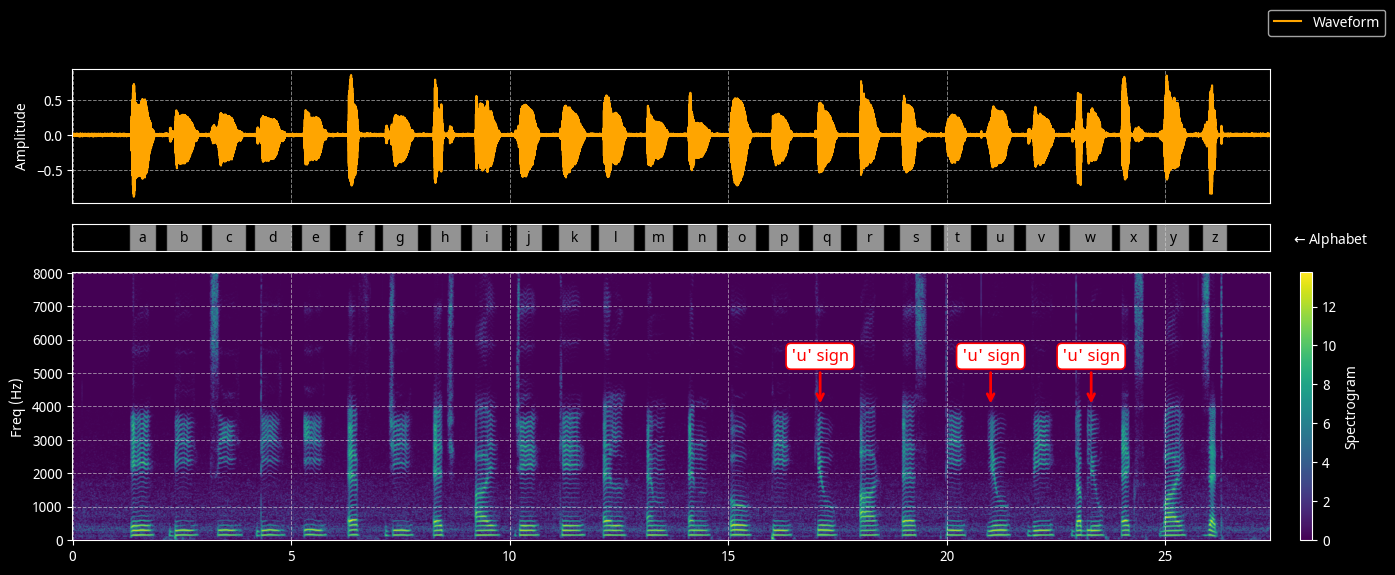

In [6]:
fig = ms.fig("sam")
fig.add_signal(y, np.arange(y.size) / sr, label="Waveform", ylabel="Amplitude", c="orange")
fig.add_annotation(ann, label="$\\leftarrow$Alphabet")
fig.add_matrix(*compute_spec(y, sr, 100), label="Spectrogram", ylabel="Freq (Hz)", o="lower")
fig.add_arrows([(17.1, 4000), (21, 4000), (23.3, 4000)], "'u' sign", text_offset=(0, 1500))
fig.add_legend(0.95)

## Vowels

In [7]:
y, sr, title = ms.load("../../../data/mydata/vowels.wav", sr=16000)
ann = ms.load_ann("../../../data/mydata/vowels-labels.txt")
S, S_f, S_t = compute_spec(y, sr, 100)

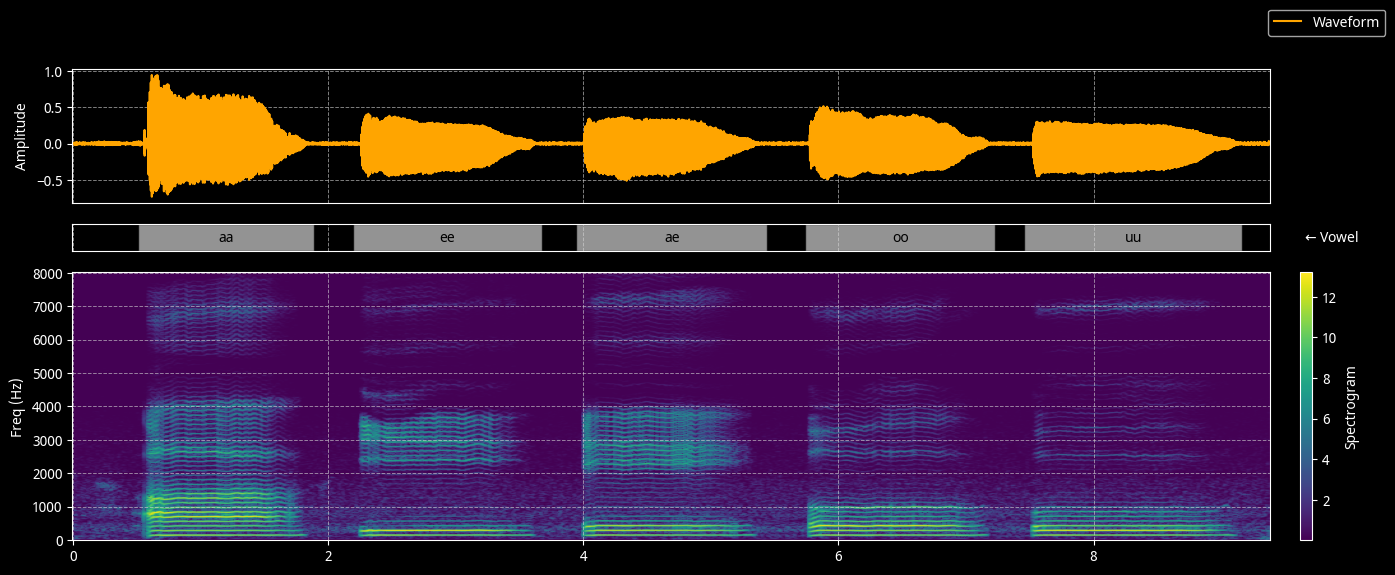

In [8]:
fig = ms.fig("sam")
fig.add_signal(y, np.arange(y.size) / sr, label="Waveform", ylabel="Amplitude", c="orange")
fig.add_annotation(ann, label="$\\leftarrow$Vowel")
fig.add_matrix(S, S_f, S_t, label="Spectrogram", ylabel="Freq (Hz)", o="lower")
fig.add_arrows([(17.1, 4000), (21, 4000), (23.3, 4000)], "'u' sign", text_offset=(0, 1500))
fig.add_legend(0.95)

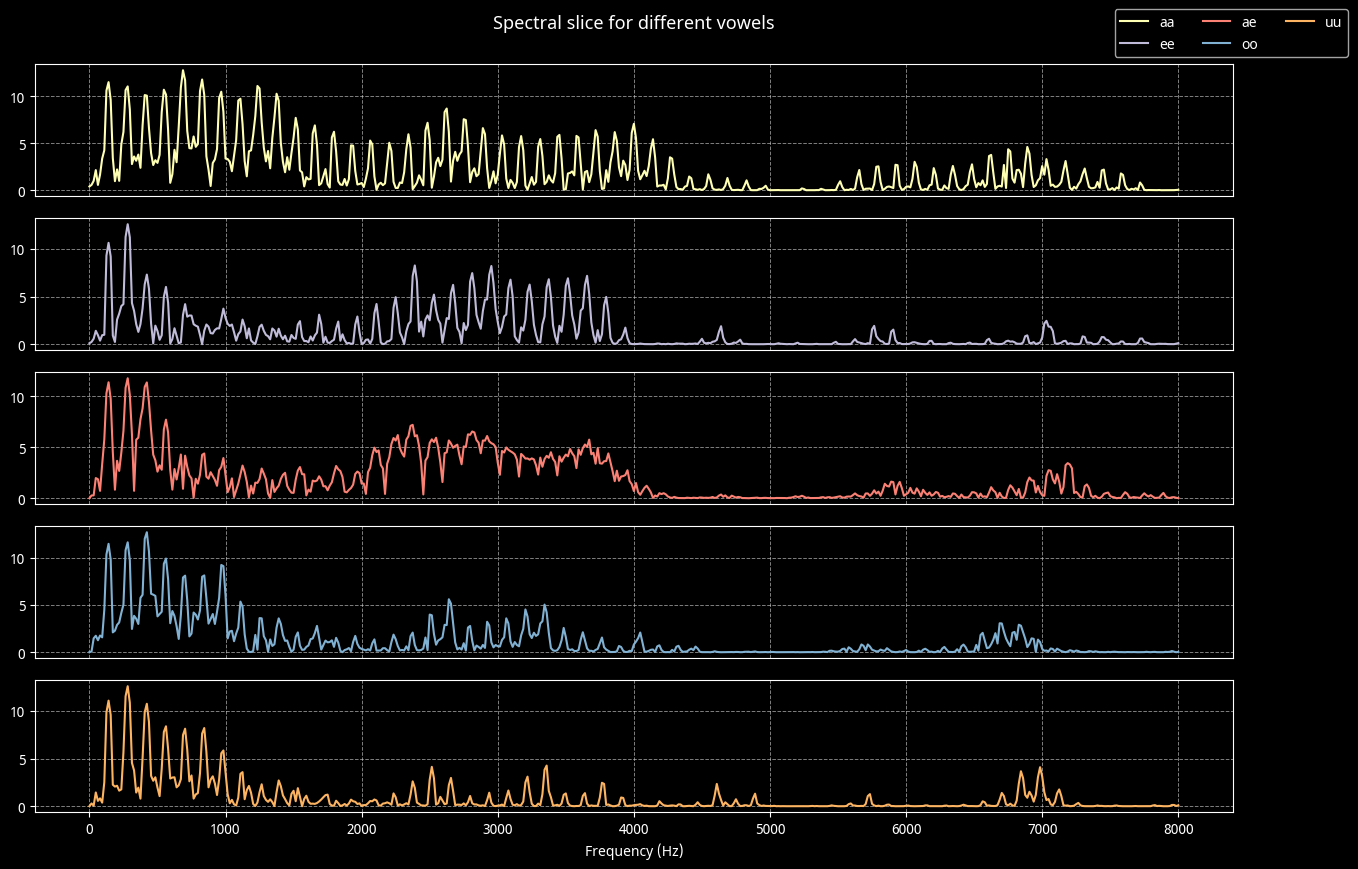

In [9]:
fig = ms.fig("sssss")
fig.add_signal(S[:,100], S_f, label="aa")
fig.add_signal(S[:, 300], S_f, label="ee")
fig.add_signal(S[:, 410], S_f, label="ae")
fig.add_signal(S[:, 600], S_f, label="oo")
fig.add_signal(S[:, 800], S_f, label="uu")
fig.add_title("Spectral slice for different vowels")
fig.add_xlabel("Frequency (Hz)")
fig.add_legend(0.92)

In [10]:
_f0, t = pw.harvest(y, sr)    # pitch extractor using harvest method
f0 = pw.stonemask(y, _f0, t, sr)  # pitch refinement
sp = pw.cheaptrick(y, f0, t, sr)  # extract smoothed spectrogram
ap = pw.d4c(y, f0, t, sr)         # extract aperiodicity
y_synth = pw.synthesize(f0, sp, ap, sr) # synthesize an utterance using the parameters

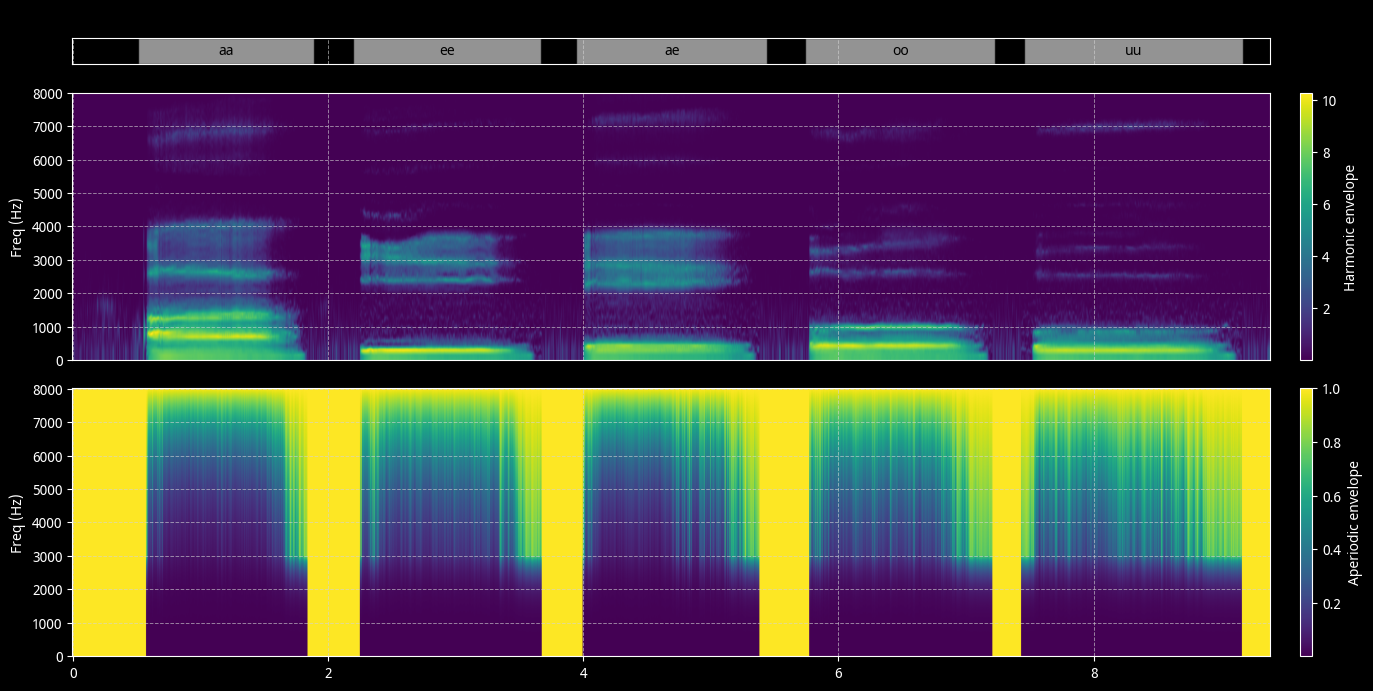

In [11]:
fft_size = (sp.T.shape[0] - 1) * 2

# Visualisation
fig = ms.fig("amm")
fig.add_annotation(ann)
fig.add_matrix(np.log(1 + 5000 * sp.T), np.arange(sp.T.shape[0]) * sr / fft_size, t, o="lower", label="Harmonic envelope", ylabel="Freq (Hz)")
fig.add_matrix(ap.T, np.arange(ap.T.shape[0]) * sr / fft_size, t, o="lower", label="Aperiodic envelope", ylabel="Freq (Hz)")